# EDA_Filtered_df

In [19]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [20]:
# read external data
df_test = pd.read_csv('~/Downloads/ds-NeueFischer-Bootcamp/phase3_machine_learning_basics/Air_Polution_Analysis/data/Test.csv')
df_train = pd.read_csv('~/Downloads/ds-NeueFischer-Bootcamp/phase3_machine_learning_basics/Air_Polution_Analysis/data/Train.csv')
#df_train.info()
#df_train.head()
#df_train.describe()
#print(df_train.dtypes)
#non_null_counts = df_train.notnull().sum()
#print(non_null_counts)
#missing_values = df_train.isnull()
#print(missing_values)
#df_train.columns
#df_train.shape

In [21]:
#Percentage of missing values: 
#missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100
#print(missing_percentage)
# Check for missing values
    #missing_values = df_train.isnull().sum()
    #print(missing_values)
df_test.head()  

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600,30.200,0.004,14.657,3.956,0.713,0.000,...,1.446,-95.985,22.942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300,42.900,0.006,15.027,4.230,0.662,0.000,...,34.642,-95.015,18.539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600,41.300,0.006,15.511,5.246,1.641,0.000,...,55.872,-94.015,14.141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.012,53.100,0.007,14.442,5.454,-0.191,0.000,...,59.174,-97.248,32.731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700,71.600,0.008,11.896,3.512,-0.279,0.000,...,40.926,-96.057,28.321,1831.262,3229.119,0.031,-100.278,41.847,-95.911,28.499


In [22]:
Filtered_df_train = df_train[['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min','target_max', 'target_variance', 'target_count','L3_NO2_NO2_column_number_density','L3_NO2_NO2_slant_column_number_density','L3_NO2_absorbing_aerosol_index',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature','L3_O3_cloud_fraction','L3_CO_CO_column_number_density','L3_CO_H2O_column_number_density',
       'L3_HCHO_HCHO_slant_column_number_density','L3_HCHO_tropospheric_HCHO_column_number_density','L3_CLOUD_cloud_fraction','L3_AER_AI_absorbing_aerosol_index','L3_SO2_SO2_column_number_density',
        'L3_SO2_SO2_column_number_density_amf','L3_SO2_SO2_slant_column_number_density','L3_SO2_absorbing_aerosol_index','L3_CH4_CH4_column_volume_mixing_ratio_dry_air']]
Filtered_df_train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,...,L3_CO_H2O_column_number_density,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_fraction,L3_AER_AI_absorbing_aerosol_index,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_CH4_CH4_column_volume_mixing_ratio_dry_air
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.000,23.000,53.000,769.500,92,0.000,0.000,...,883.332,-0.000,0.000,0.000,-1.231,-0.000,0.313,-0.000,-1.861,1793.794
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.000,25.000,63.000,1319.850,91,0.000,0.000,...,1148.985,0.000,0.000,0.059,-1.083,0.000,0.434,0.000,-1.453,1789.960
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.000,8.000,56.000,1181.960,96,0.000,0.000,...,1109.347,0.000,0.000,0.082,-1.001,0.000,0.357,0.000,-1.573,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.000,10.000,55.000,1113.670,96,0.000,0.000,...,1061.571,0.000,0.000,0.122,-0.777,0.000,0.585,0.000,-1.239,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.000,9.000,52.000,1164.820,95,0.000,0.000,...,1044.247,0.000,0.000,0.037,0.366,0.000,0.408,0.000,0.202,NaN


## Heatmap

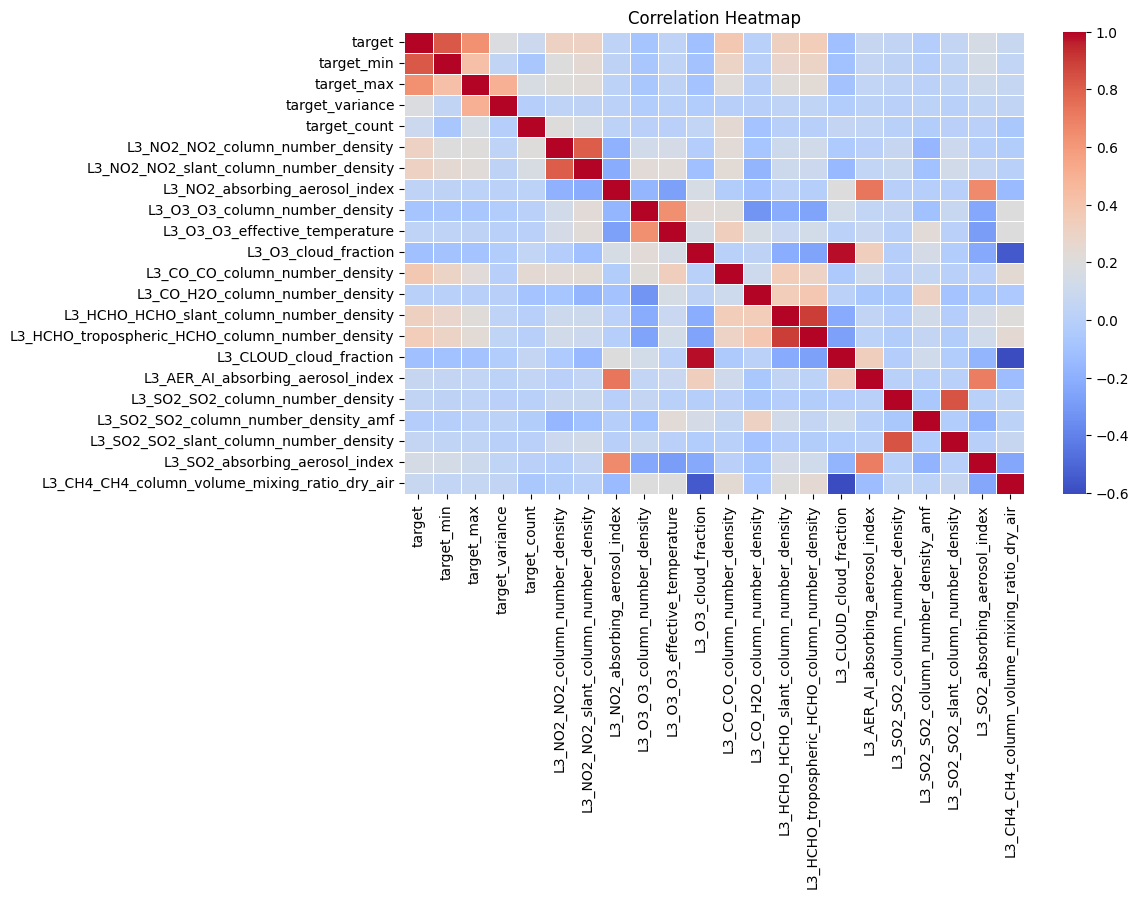

In [23]:
#The corr() method computes pairwise correlation between numerical columns only. Filter the DataFrame to include only numerical columns.
filtered_df_train_numeric = Filtered_df_train.select_dtypes(include=['number'])
correlation_matrix = filtered_df_train_numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Multiple Scatterplot

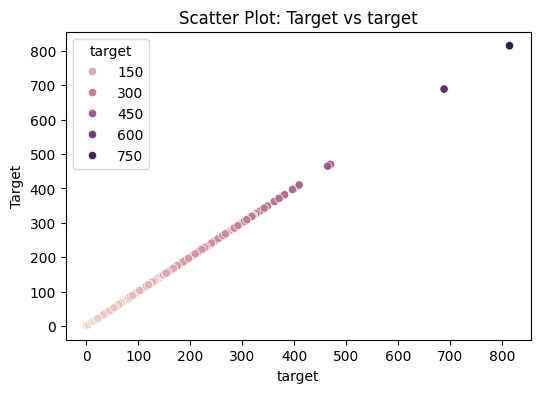

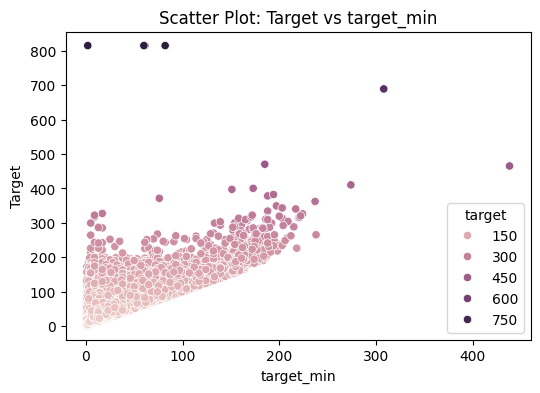

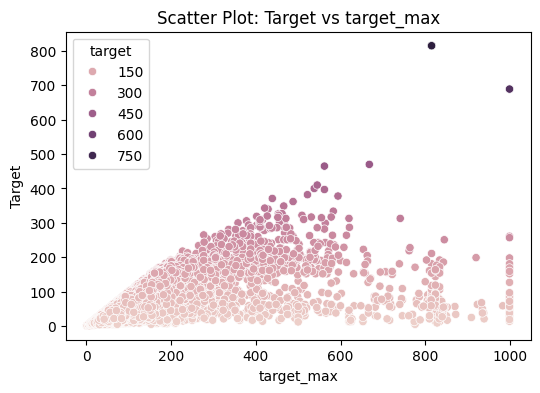

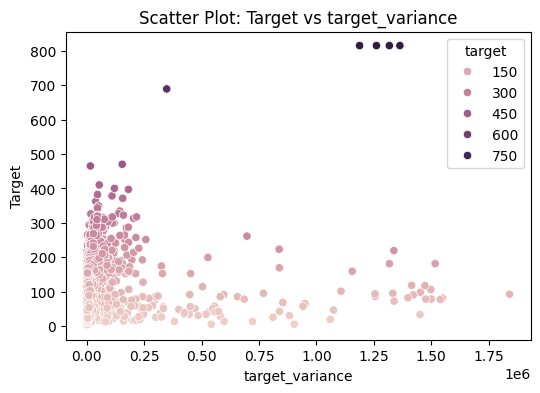

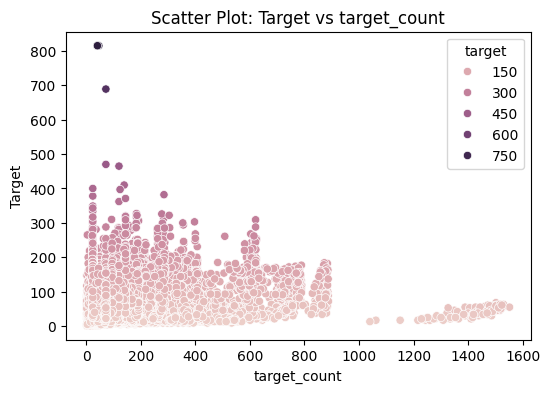

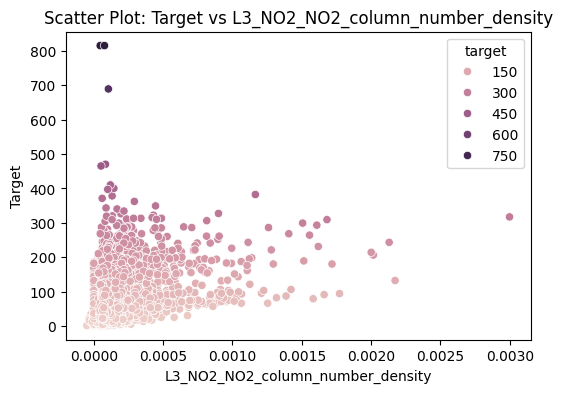

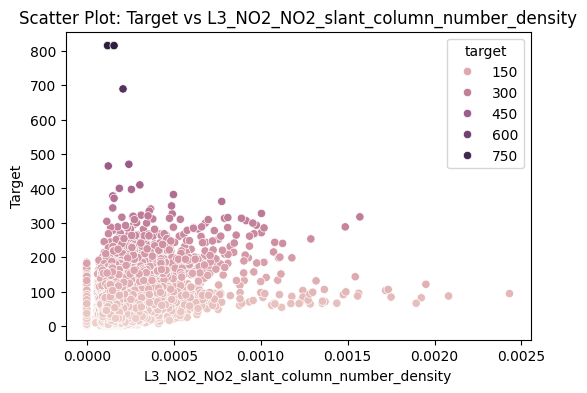

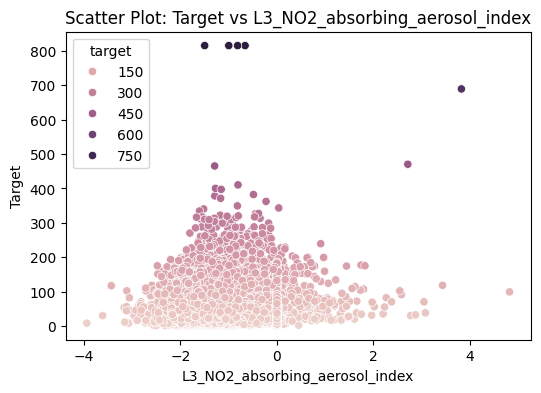

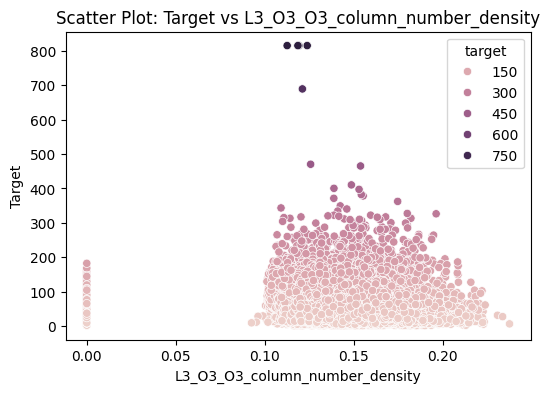

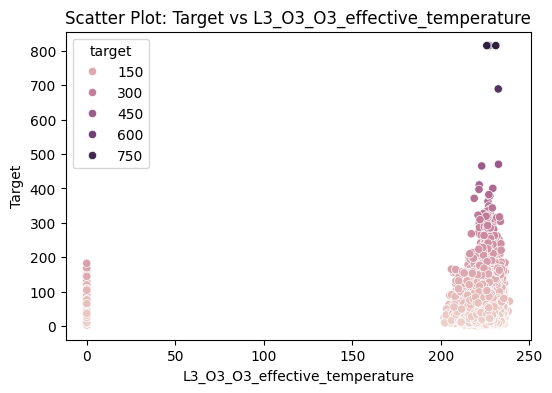

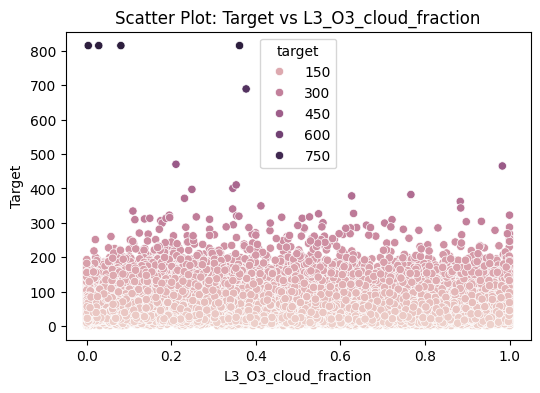

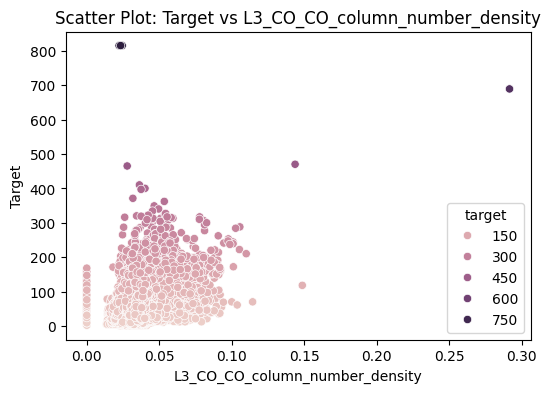

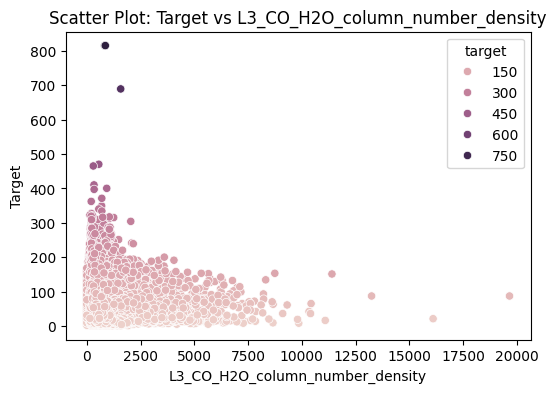

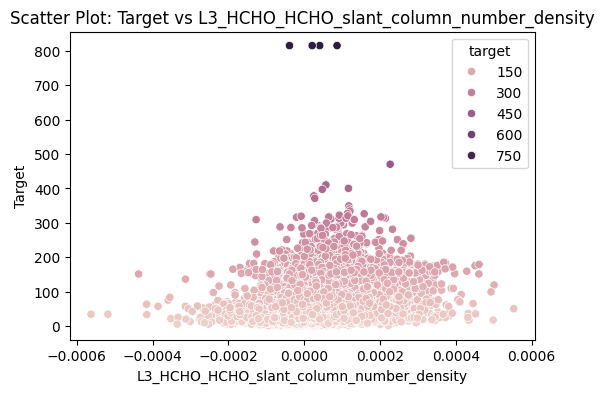

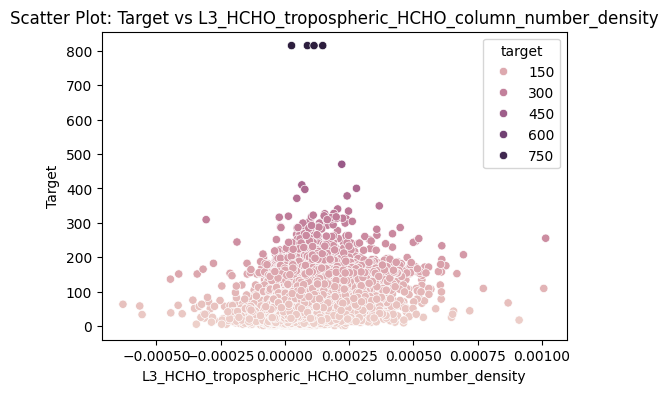

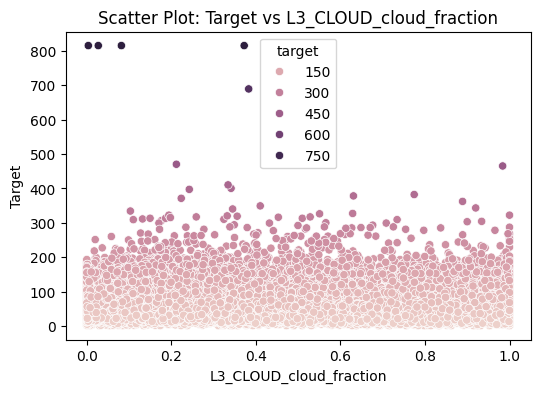

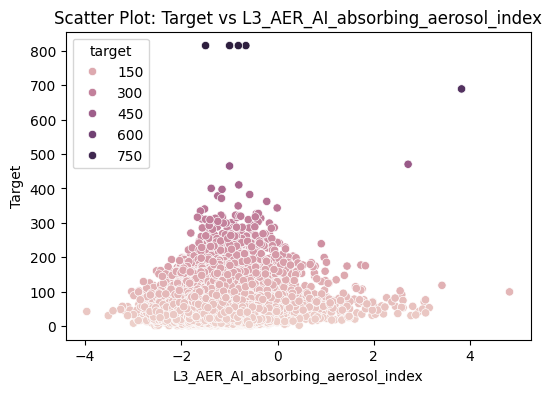

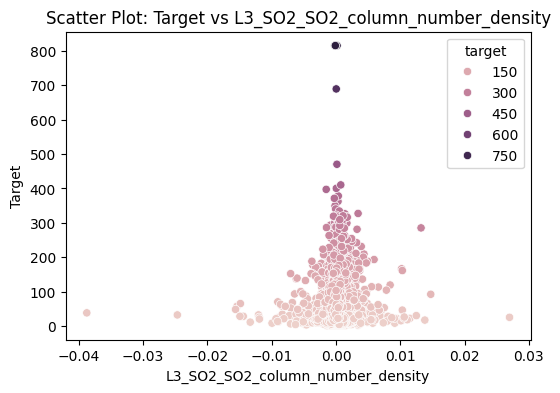

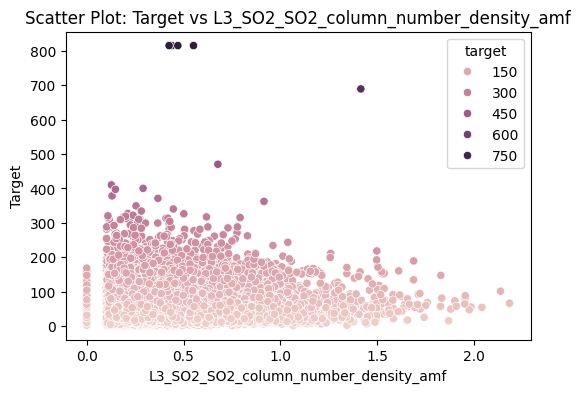

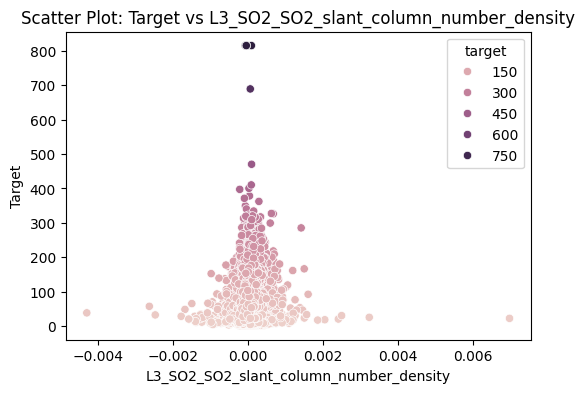

KeyboardInterrupt: 

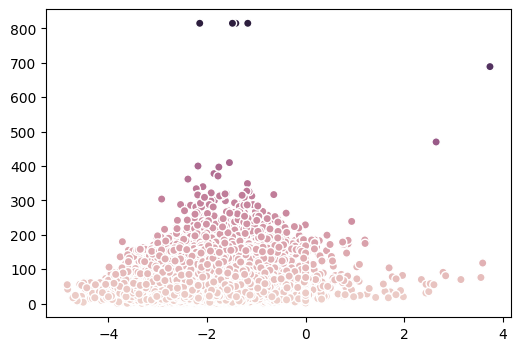

In [24]:
features = filtered_df_train_numeric.columns
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='target', data=filtered_df_train_numeric, hue='target')
    plt.title(f"Scatter Plot: Target vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Target")
    plt.show()

## Pairplots for multiple features 

In [ ]:
#see which feature you want to visualize with pairplot
#sns.pairplot(df[['target', 'feature1', 'feature2', 'feature3']])
#plt.show()

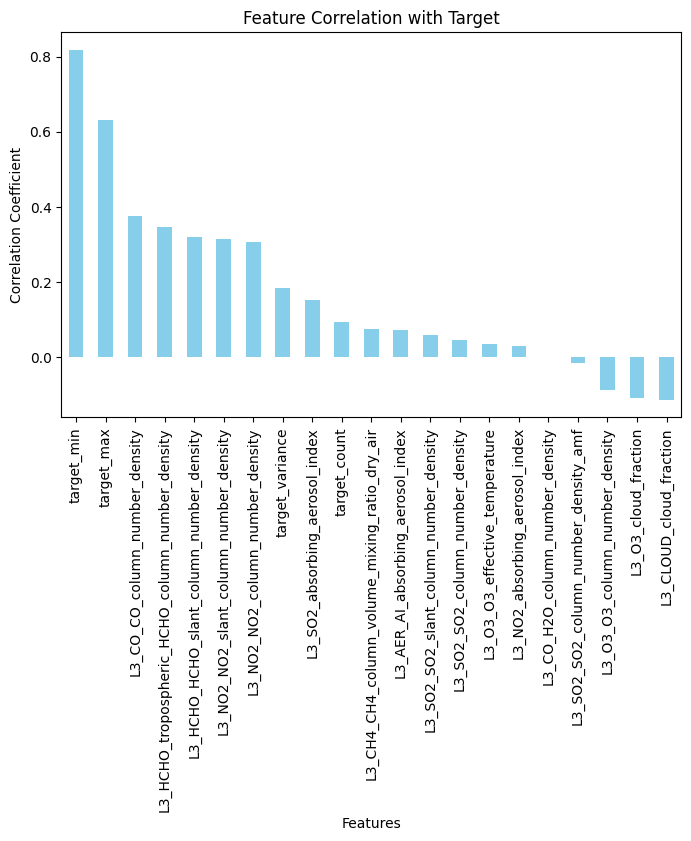

In [ ]:
#Feature correlation with target variable; correlation coefficient 
correlations = filtered_df_train_numeric.corr()['target'].drop('target')  # Correlation of all features with target
# Plot
plt.figure(figsize=(8, 5))
correlations.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Correlation with Target")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.show()

# EDA_all

In [38]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [39]:
# read external data
df_test = pd.read_csv('~/Downloads/ds-NeueFischer-Bootcamp/phase3_machine_learning_basics/Air_Polution_Analysis/data/Test.csv')
df_train = pd.read_csv('~/Downloads/ds-NeueFischer-Bootcamp/phase3_machine_learning_basics/Air_Polution_Analysis/data/Train.csv')
#df_train.info()
#df_train.head()
#df_train.describe()
#print(df_train.dtypes)
#non_null_counts = df_train.notnull().sum()
#print(non_null_counts)
#missing_values = df_train.isnull()
#print(missing_values)
#df_train.columns
df_train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.000,23.000,53.000,769.500,92,11.000,60.200,...,38.593,-61.753,22.364,1793.794,3227.855,0.011,74.481,37.501,-62.143,22.545
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.000,25.000,63.000,1319.850,91,14.600,48.800,...,59.625,-67.694,28.615,1789.960,3384.227,0.015,75.630,55.657,-53.868,19.294
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.000,8.000,56.000,1181.960,96,16.400,33.400,...,49.840,-78.343,34.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.000,10.000,55.000,1113.670,96,6.912,21.300,...,29.181,-73.897,30.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.000,9.000,52.000,1164.820,95,13.900,44.700,...,0.797,-68.612,26.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN


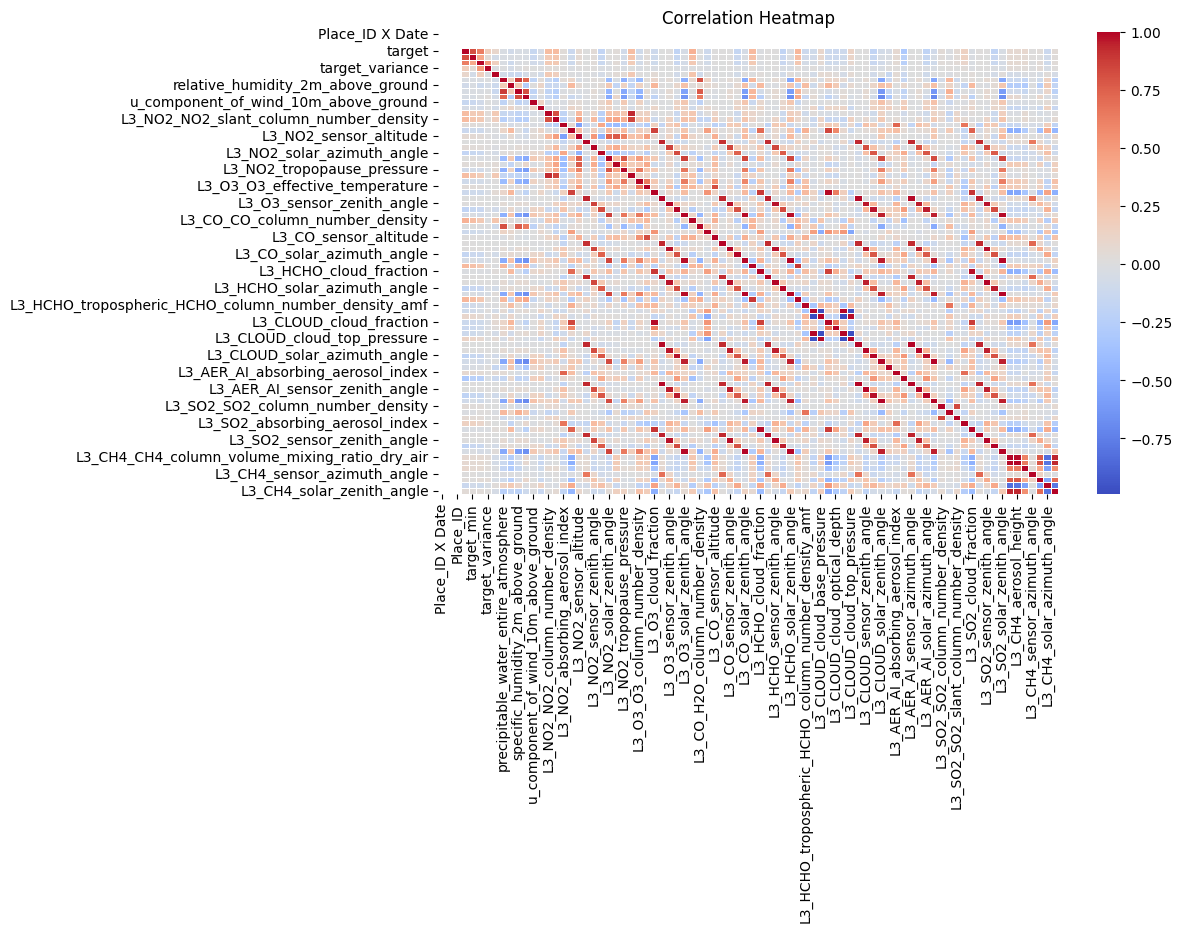

In [40]:
#The corr() method computes pairwise correlation between numerical columns only. Filter the DataFrame to include only numerical columns.
df_numeric = df_train.copy()
df_numeric[df_numeric.select_dtypes(exclude=['number']).columns] = 0


# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Multicolineratiy is not a problem for decision trees models 
# Detect multicollinearity using VIF
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for all features
#X = df.drop(columns=['target'])  # Exclude target
#vif_data = pd.df_train()
#vif_data['Feature'] = X.columns
#vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#print(vif_data)


In [5]:
# Detect multicollinearity(high correlation between features) using correlation matrix, not necessary for decision tree 
# Set the correlation threshold
threshold = 0.8

# Create a mask to filter the upper triangle of the correlation matrix
mask = correlation_matrix.abs() > threshold
mask.values[np.triu_indices_from(mask)] = False  # Exclude self-correlations and duplicate pairs

# Extract the correlated feature pairs
high_corr_pairs = correlation_matrix[mask].stack()
print("Highly Correlated Feature Pairs:")
print(high_corr_pairs)

Highly Correlated Feature Pairs:
target_min                                     target                                           0.819
specific_humidity_2m_above_ground              precipitable_water_entire_atmosphere             0.882
temperature_2m_above_ground                    specific_humidity_2m_above_ground                0.816
L3_NO2_NO2_slant_column_number_density         L3_NO2_NO2_column_number_density                 0.810
L3_NO2_tropospheric_NO2_column_number_density  L3_NO2_NO2_column_number_density                 0.932
                                                                                                ...  
L3_SO2_solar_zenith_angle                      L3_AER_AI_solar_zenith_angle                     0.950
L3_CH4_aerosol_height                          L3_CH4_CH4_column_volume_mixing_ratio_dry_air    0.990
L3_CH4_solar_azimuth_angle                     L3_CH4_CH4_column_volume_mixing_ratio_dry_air   -0.825
L3_CH4_solar_zenith_angle                      L3

In [ ]:
##Pairplots Check for linear or non-linear trends ; features with very similar distributions may be redundant. 
# sns.pairplot(df_numeric, diag_kind='kde', corner=True)
#plt.show()

In [6]:
# Select features with a high positive or negative correlation with the target (r∣>0.3 is often a good threshold).Avoid features with near-zero correlation (∣r∣<0.1) unless they have specific domain significance. 
# Compute correlation of each feature with the target
target_correlation = df_numeric.corr()['target'].sort_values(ascending=False)
print(target_correlation)

target                                             1.000
target_min                                         0.819
target_max                                         0.631
L3_CO_CO_column_number_density                     0.376
L3_HCHO_tropospheric_HCHO_column_number_density    0.347
                                                   ...  
L3_AER_AI_solar_azimuth_angle                     -0.193
L3_AER_AI_sensor_altitude                         -0.308
Place_ID X Date                                      NaN
Date                                                 NaN
Place_ID                                             NaN
Name: target, Length: 82, dtype: float64


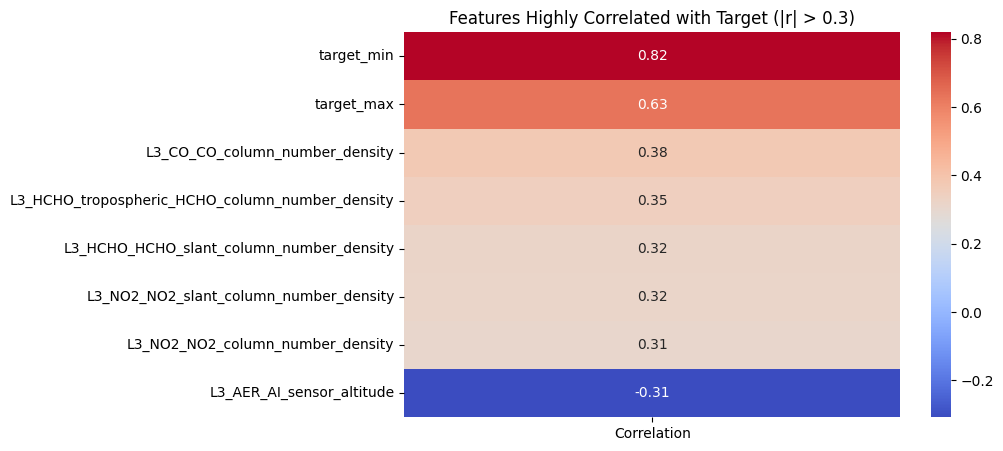

In [7]:
# Compute correlation of each feature with the target
correlation_with_target = df_numeric.corr()['target'].drop('target')  # Exclude target self-correlation

# Filter features with high correlation (|r| > 0.3)
high_corr_features = correlation_with_target[correlation_with_target.abs() > 0.3]

# Convert to DataFrame for visualization
high_corr_df = high_corr_features.sort_values(ascending=False).to_frame(name='Correlation')

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(high_corr_df, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Features Highly Correlated with Target (|r| > 0.3)')
plt.show()

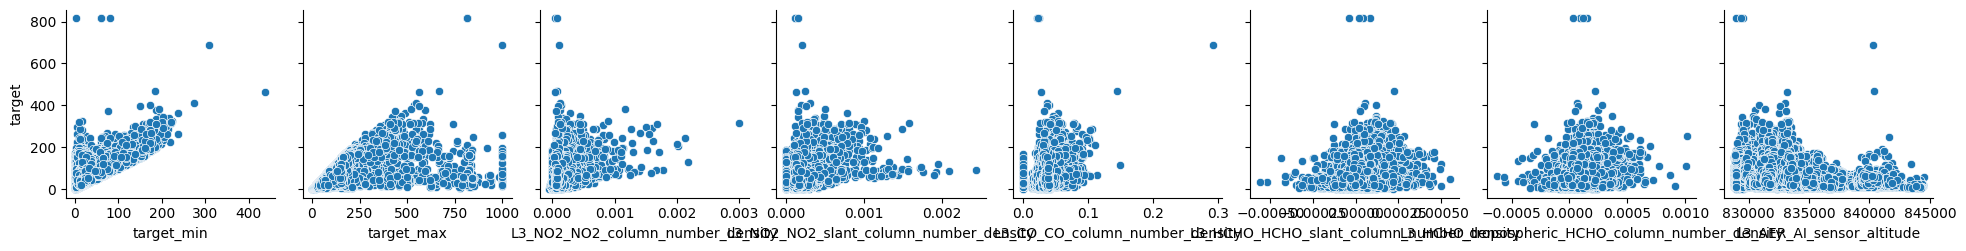

In [8]:
# Plot scatterplots for selected features
sns.pairplot(df_numeric, x_vars=high_corr_features.index, y_vars=['target'], diag_kind='kde')
plt.show()

In [ ]:
# Boxplot for each feature
# List of features (excluding target)
#features = [col for col in df_numeric.columns if col != 'target']

# Plot boxplots for all features vs target
#for feature in features:
    #plt.figure(figsize=(8, 6))
    #sns.boxplot(x=df_numeric[feature], y=df_numeric['target'])
    #plt.title(f'Boxplot: Target vs {feature}')
    #plt.xlabel(feature)
    #plt.ylabel('Target')
    #plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    #plt.show()

In [9]:
#In order to dertermine feature omportance using tree-based model, we need to preprocess non-numerical data.
# Check data types of each column
print(df_train.dtypes)

# List non-numeric columns
non_numeric_columns = df_train.select_dtypes(exclude=['number']).columns
print("Non-Numeric Columns:", non_numeric_columns)

Place_ID X Date                  object
Date                             object
Place_ID                         object
target                          float64
target_min                      float64
                                 ...   
L3_CH4_aerosol_optical_depth    float64
L3_CH4_sensor_azimuth_angle     float64
L3_CH4_sensor_zenith_angle      float64
L3_CH4_solar_azimuth_angle      float64
L3_CH4_solar_zenith_angle       float64
Length: 82, dtype: object
Non-Numeric Columns: Index(['Place_ID X Date', 'Date', 'Place_ID'], dtype='object')


In [41]:
#Check the percentage of missing values for each feature:
missing_percentage = df_train.isnull().mean() * 100
print(missing_percentage.sort_values(ascending=False))


L3_CH4_sensor_azimuth_angle            81.045
L3_CH4_aerosol_height                  81.045
L3_CH4_solar_zenith_angle              81.045
L3_CH4_solar_azimuth_angle             81.045
L3_CH4_aerosol_optical_depth           81.045
                                        ...  
Place_ID                                0.000
Place_ID X Date                         0.000
Date                                    0.000
precipitable_water_entire_atmosphere    0.000
relative_humidity_2m_above_ground       0.000
Length: 82, dtype: float64


In [42]:
#Remove Features with Too Many Missing Values, If a feature has more than a certain threshold of missing values (e.g., >50%), it might be irrelevant for your model
threshold = 0.5
Filtered_df_train = df_train.loc[:, missing_percentage < (threshold * 100)]
Filtered_df_train.head()


,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.000,23.000,53.000,769.500,92,11.000,60.200,...,22.358,-0.000,0.313,-0.000,-1.861,0.000,76.536,38.593,-61.753,22.364
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.000,25.000,63.000,1319.850,91,14.600,48.800,...,28.615,0.000,0.434,0.000,-1.453,0.059,-14.708,59.625,-67.694,28.615
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.000,8.000,56.000,1181.960,96,16.400,33.400,...,34.297,0.000,0.357,0.000,-1.573,0.082,-105.201,49.840,-78.343,34.297
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.000,10.000,55.000,1113.670,96,6.912,21.300,...,30.545,0.000,0.585,0.000,-1.239,0.121,-104.334,29.181,-73.897,30.545
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.000,9.000,52.000,1164.820,95,13.900,44.700,...,26.900,0.000,0.408,0.000,0.202,0.038,58.850,0.797,-68.612,26.900


In [12]:
filtered_df_train = Filtered_df_train.drop(['Date', 'Place_ID X Date','Place_ID'], axis= 1, inplace=True, errors='ignore')

filtered_df_train = Filtered_df_train.drop(['date'], axis= 1, inplace=True, errors='ignore')
Filtered_df_train.head()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,38.000,23.000,53.000,769.500,92,11.000,60.200,0.008,18.517,1.996,...,22.358,-0.000,0.313,-0.000,-1.861,0.000,76.536,38.593,-61.753,22.364
1,39.000,25.000,63.000,1319.850,91,14.600,48.800,0.008,22.547,3.330,...,28.615,0.000,0.434,0.000,-1.453,0.059,-14.708,59.625,-67.694,28.615
2,24.000,8.000,56.000,1181.960,96,16.400,33.400,0.007,27.031,5.066,...,34.297,0.000,0.357,0.000,-1.573,0.082,-105.201,49.840,-78.343,34.297
3,49.000,10.000,55.000,1113.670,96,6.912,21.300,0.004,23.972,3.004,...,30.545,0.000,0.585,0.000,-1.239,0.121,-104.334,29.181,-73.897,30.545
4,21.000,9.000,52.000,1164.820,95,13.900,44.700,0.005,16.816,2.622,...,26.900,0.000,0.408,0.000,0.202,0.038,58.850,0.797,-68.612,26.900


In [ ]:

Filtered_df_train.fillna(Filtered_df_train.mean(), inplace=True)  # For numeric columns
print(Filtered_df_train.isnull().sum()) #Ensure that 0 is printed for all numeric columns


target                         0
target_min                     0
target_max                     0
target_variance                0
target_count                   0
                              ..
L3_SO2_cloud_fraction          0
L3_SO2_sensor_azimuth_angle    0
L3_SO2_sensor_zenith_angle     0
L3_SO2_solar_azimuth_angle     0
L3_SO2_solar_zenith_angle      0
Length: 72, dtype: int64


In [ ]:
#Scale/normalize the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Filtered_df_train_scaled = pd.DataFrame(scaler.fit_transform(Filtered_df_train), columns=Filtered_df_train.columns)


In [21]:
from sklearn.model_selection import train_test_split

X = Filtered_df_train.drop('target', axis=1)  # Replace with your target column
y = Filtered_df_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)



In [25]:
# Train the model on training data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Predict on test data
y_pred = regressor.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 8.785272742146597
Mean Squared Error (MSE): 235.5905137567081
Root Mean Squared Error (RMSE): 15.348958067462043
R² Score: 0.8929184283309228


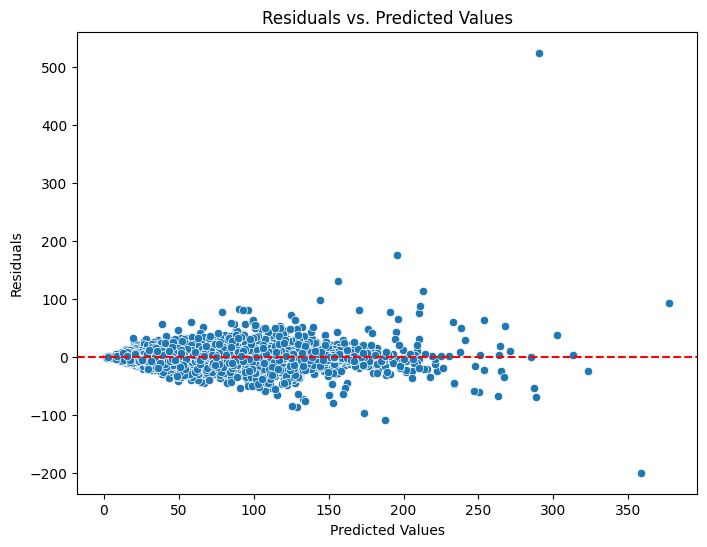

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
y_pred = regressor.predict(X_test)
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

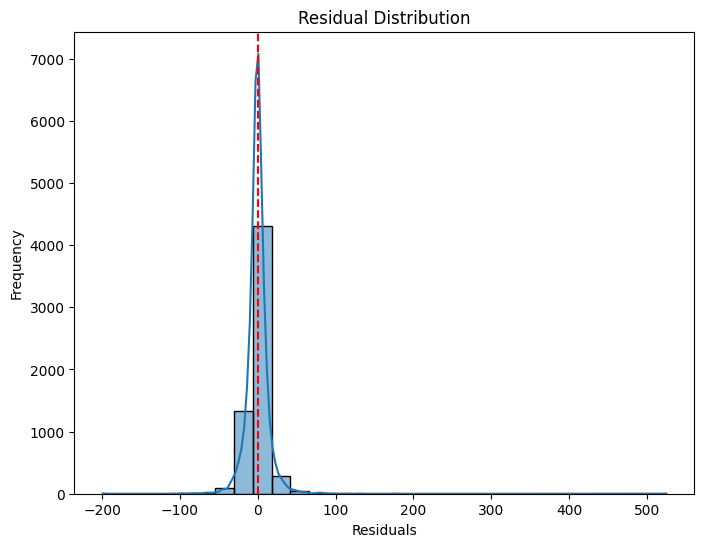

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

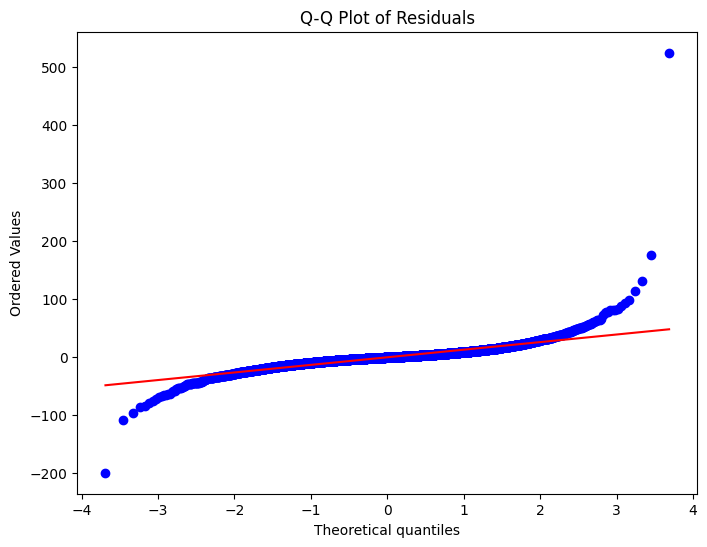

In [31]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Training metrics
y_train_pred = regressor.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing metrics
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Training RMSE: {train_rmse:.2f}, MAE: {train_mae:.2f}, R²: {train_r2:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.2f}")

Training RMSE: 6.26, MAE: 3.32, R²: 0.98
Testing RMSE: 15.35, MAE: 8.79, R²: 0.89


In [33]:
baseline_pred = [y_train.mean()] * len(y_test)
baseline_rmse = mean_squared_error(y_test, baseline_pred, squared=False)
baseline_mae = mean_absolute_error(y_test, baseline_pred)

print(f"Baseline RMSE: {baseline_rmse:.2f}, MAE: {baseline_mae:.2f}")

Baseline RMSE: 46.91, MAE: 34.53


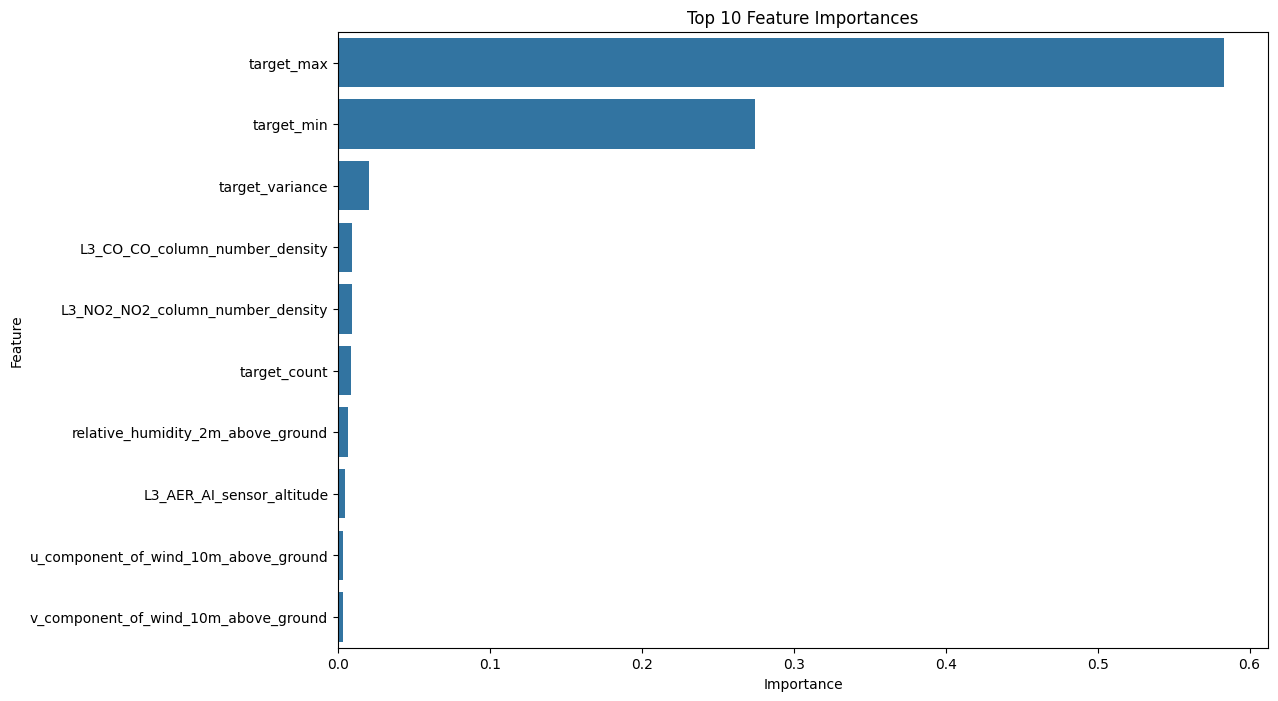

In [34]:
import pandas as pd
importance = regressor.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [35]:
#Use cross-validation to confirm the model’s robustness=> assess generalization 
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse = (-cv_scores.mean()) ** 0.5
print(f"Cross-Validated RMSE: {cv_rmse:.2f}")

KeyboardInterrupt: 

In [28]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 1.4min


KeyboardInterrupt: 

In [20]:
# Determine feature importance using Tree-based model 
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest
X = df_numeric.drop(columns=['target'])
y = df_numeric['target']
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

KeyboardInterrupt: 